In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [66]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print("NAIVE BAYERS CLASSIFICATION")

In [67]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [68]:
nb.fit(X_train,y_train)

GaussianNB()

In [69]:
nb.score(X_test,y_test)

0.7665369649805448

In [70]:
y_pred = nb.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [72]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

array([[133,  35],
       [ 32,  54]], dtype=int64)

In [73]:
print("Classification Report")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.61      0.63      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [74]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [79]:
print("\nDECISION TREE CLASSIFICATION")
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
print("Testing Score")
dt.score(X_test,y_test)

1.0

In [81]:
y_pred_dt = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       168
           1       0.57      0.62      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.69       254
weighted avg       0.72      0.71      0.72       254



In [1]:
print("Confusion Matrix")
confusion_matrix(y_test,y_pred_dt)

Confusion Matrix


NameError: name 'confusion_matrix' is not defined

In [2]:
print("Classification Report")
print(classification_report(y_test,y_pred_dt))

Classification Report


NameError: name 'classification_report' is not defined

In [84]:
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

In [85]:
dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

array([2.58500881e-01, 5.94379993e-02, 2.67719434e-02, 1.68176607e-01,
       5.16851536e-01, 5.34078136e-01, 4.03373821e-03, 1.88329196e-01,
       4.70288009e-01, 7.55332246e-01, 2.41723968e-01, 9.77311984e-01,
       7.41198127e-01, 2.66534465e-01, 2.09300597e-02, 2.90051166e-01,
       5.81952383e-02, 2.78381109e-02, 6.65473189e-01, 3.05905020e-01,
       1.25789794e-01, 3.65830317e-02, 8.67783689e-01, 2.39732820e-02,
       6.31075876e-01, 9.61551336e-01, 3.38960152e-02, 1.01267746e-02,
       1.77983319e-01, 5.69664651e-02, 9.51561056e-01, 8.38046386e-01,
       9.82693455e-01, 4.93893982e-01, 6.19134827e-01, 8.95406833e-01,
       9.99829888e-01, 1.94902894e-01, 7.12086734e-01, 1.36866529e-01,
       1.84426073e-02, 3.45792103e-01, 4.10638725e-01, 5.44071306e-01,
       2.43212429e-02, 8.19236677e-01, 9.53939077e-01, 9.09530233e-02,
       3.82306697e-01, 9.98444649e-01, 1.20972703e-02, 9.05836752e-01,
       9.97591552e-01, 7.94905025e-02, 6.84046489e-02, 1.65005119e-02,
      

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

In [87]:
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [88]:
print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

Decision Tree: AUROC = 0.6890919158361019
Naive Bayes: AUROC = 0.7857834994462902


In [89]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

In [90]:
import matplotlib.pyplot as plt

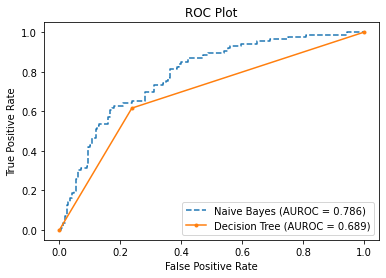

In [91]:
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

NAIVE BAYERS CLASSIFICATION
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.61      0.63      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254


DECISION TREE CLASSIFICATION
Testing Score
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       168
           1       0.57      0.64      0.60        86

    accuracy                           0.72       254
   macro avg       0.69      0.70      0.69       254
weighted avg       0.73      0.72      0.72       254

Decision Tree AUROC = 0.6977436323366556
Naive Bayes AUROC = 0.7857834994462902


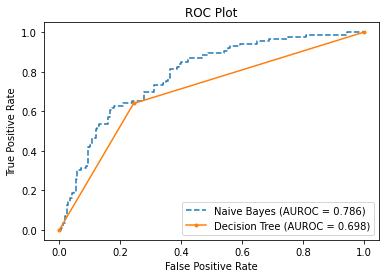

In [3]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

df.head()

df.isnull().sum()

from sklearn.model_selection import train_test_split

X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("NAIVE BAYERS CLASSIFICATION")

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)

nb.score(X_test,y_test)

y_pred = nb.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix")
confusion_matrix(y_test,y_pred)

print("Classification Report")
print(classification_report(y_test,y_pred))

X=df.drop(columns=['Outcome'])
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import tree
dt = tree.DecisionTreeClassifier()

print("\nDECISION TREE CLASSIFICATION")
dt.fit(X_train,y_train)
print("Testing Score")
dt.score(X_test,y_test)

y_pred_dt = dt.predict(X_test)

print("Confusion Matrix")
confusion_matrix(y_test,y_pred_dt)

print("Classification Report")
print(classification_report(y_test,y_pred_dt))

nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)

dt_probs = dt_probs[:, 1]
nb_probs = nb_probs[:, 1]
nb_probs

from sklearn.metrics import roc_curve, roc_auc_score

nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

print('Decision Tree AUROC = ' + str(dt_auc))
print('Naive Bayes AUROC = ' + str(nb_auc))

nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

import matplotlib.pyplot as plt

plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()
